# Handwritten Digit Recognition(MNIST Dataset) Using Convolutional Neural Networks

## Importing, Loading & Visualizing

In [16]:
# Import the required libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
# Loading the dataset

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Examine the shape and how each data point looks like

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


In [4]:
# Examine a data point

print(X_train[0])
print(Y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
def plot_img(X, Y, ind):
    sample = X[ind]
    label = Y[ind]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(sample, cmap = 'gray')
    ax.set_title(label)

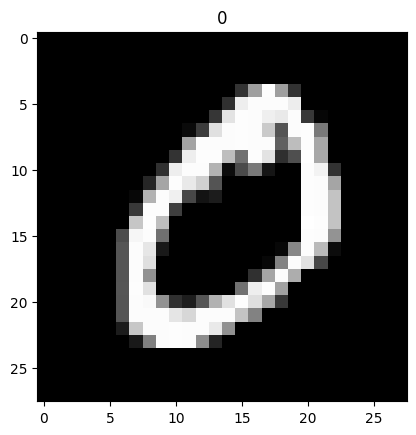

In [6]:
plot_img(X_train, Y_train, 1)

## Preprocessimg Data

In [7]:
# Normalizing Values

X_train = X_train / 255
X_test = X_test / 255

# Reshaping the arrays

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [8]:
# Splitting Data into Training Set & Validation Set

x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train,
    test_size=0.2,
    stratify=Y_train,
    random_state=3
)

## Building the Convolutional Neural Network and Training It

In [9]:
# Building the model

model = Sequential([

    Input(shape=(28, 28, 1)),
    
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(units=64, activation="relu"),
    Dense(units=10, activation="softmax"),
    
])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,522 (166.10 KB)

 Trainable params: 42,522 (166.10 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss = SparseCategoricalCrossentropy(),
             optimizer = Adam(learning_rate=0.001),
             metrics = ['accuracy'])

In [12]:
# Implement Early Stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [13]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100, 
    callbacks=[early_stopping])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8756 - loss: 0.4094 - val_accuracy: 0.9827 - val_loss: 0.0560
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9794 - loss: 0.0641 - val_accuracy: 0.9865 - val_loss: 0.0411
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9872 - loss: 0.0416 - val_accuracy: 0.9902 - val_loss: 0.0272
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9905 - loss: 0.0302 - val_accuracy: 0.9928 - val_loss: 0.0223
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9920 - loss: 0.0245 - val_accuracy: 0.9911 - val_loss: 0.0257
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9931 - loss: 0.0225 - val_accuracy: 0.9942 - val_loss: 0.0172
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9948 - loss: 0.0162 - val_accuracy: 0.9948 - val_loss: 0.0159
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9953 -

In [14]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9872 - loss: 0.0609


[0.042122360318899155, 0.9902999997138977]

## Result Analysis

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


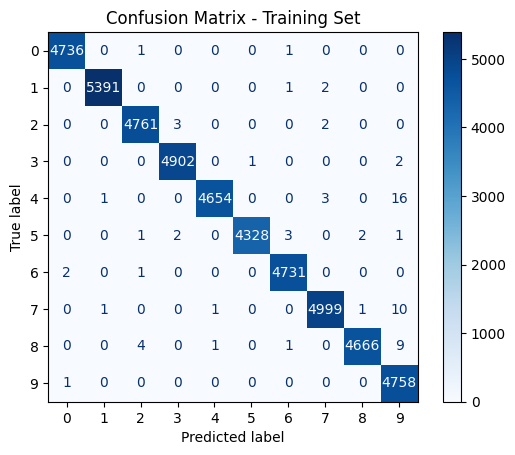

In [17]:
# Making a COnfusion Matrix

y_pred_probs = model.predict(x_train)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Training Set")
plt.show()

In [19]:
# Examining Precision, Recall & F1-Score

report = classification_report(y_train, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9994    0.9996    0.9995      4738
           1     0.9996    0.9994    0.9995      5394
           2     0.9985    0.9990    0.9987      4766
           3     0.9990    0.9994    0.9992      4905
           4     0.9996    0.9957    0.9976      4674
           5     0.9998    0.9979    0.9988      4337
           6     0.9987    0.9994    0.9990      4734
           7     0.9986    0.9974    0.9980      5012
           8     0.9994    0.9968    0.9981      4681
           9     0.9921    0.9998    0.9959      4759

    accuracy                         0.9985     48000
   macro avg     0.9985    0.9984    0.9984     48000
weighted avg     0.9985    0.9985    0.9985     48000



## Final Results

We have achieved an accuracy of 98.72% on the training set with our CNN. This is a big step forward compared to our previous neural network that achieved an accuracy of 92-97%.
